# Data cleaning and Feature extraction

In [1]:
import pandas as pd

# Load your IMU data CSV
df = pd.read_csv('C:/Users/adiun/Downloads/topics.csv')

# Preview the first few rows
print(df.head())


                                  _cmd_vel_linear  \
0  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   
1  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   
2  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   
3  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   
4  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   

                                 _cmd_vel_angular  \
0  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   
1  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   
2  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   
3  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   
4  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   

                                    _imu_orientation  \
0  geometry_msgs.msg.Quaternion(x=4.9357257200854...   
1  geometry_msgs.msg.Quaternion(x=4.9357287080425...   
2  geometry_msgs.msg.Quaternion(x=4.9357232101989...   
3  geometry_msgs.msg.Quaternion(x=4.9357234207785...   
4  geometry_msgs.msg.Quaternion(x=4.9357215165036...   

                         

In [3]:
df_cleaned = df.drop_duplicates()
# Drop rows with any missing values
df_cleaned = df.dropna()

In [5]:
print("\nCount of rows after dropping duplicates:", df_cleaned.shape[0])


Count of rows after dropping duplicates: 6229


In [7]:
df['_cmd_vel_linear'] = df['_cmd_vel_linear'].astype(str)
df['_cmd_vel_angular'] = df['_cmd_vel_angular'].astype(str)
df['_imu_orientation'] = df['_imu_orientation'].astype(str)
df['_imu_angular_velocity'] = df['_imu_angular_velocity'].astype(str)
df['_imu_linear_acceleration'] = df['_imu_linear_acceleration'].astype(str)

In [19]:
def parse_vector(vector_str):
    # Check if input is already a list; if so, return it
    if isinstance(vector_str, list):
        return vector_str
    # If input is not a string, return NaN placeholders
    if not isinstance(vector_str, str):
        return [np.nan, np.nan, np.nan]
    # Parse the string for x, y, z values
    match = re.findall(r"x=([-\d.e]+),\s*y=([-\d.e]+),\s*z=([-\d.e]+)", vector_str)
    return list(map(float, match[0])) if match else [np.nan, np.nan, np.nan]

def parse_quaternion(quaternion_str):
    # Check if input is already a list; if so, return it
    if isinstance(quaternion_str, list):
        return quaternion_str
    # If input is not a string, return NaN placeholders
    if not isinstance(quaternion_str, str):
        return [np.nan, np.nan, np.nan, np.nan]
    # Parse the string for x, y, z, w values
    match = re.findall(r"x=([-\d.e]+),\s*y=([-\d.e]+),\s*z=([-\d.e]+),\s*w=([-\d.e]+)", quaternion_str)
    return list(map(float, match[0])) if match else [np.nan, np.nan, np.nan, np.nan]


In [11]:
print(df.head())

                                  _cmd_vel_linear  \
0  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   
1  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   
2  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   
3  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   
4  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   

                                 _cmd_vel_angular  \
0  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   
1  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   
2  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   
3  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   
4  geometry_msgs.msg.Vector3(x=0.0, y=0.0, z=0.0)   

                                    _imu_orientation  \
0  geometry_msgs.msg.Quaternion(x=4.9357257200854...   
1  geometry_msgs.msg.Quaternion(x=4.9357287080425...   
2  geometry_msgs.msg.Quaternion(x=4.9357232101989...   
3  geometry_msgs.msg.Quaternion(x=4.9357234207785...   
4  geometry_msgs.msg.Quaternion(x=4.9357215165036...   

                         

In [21]:
df['_cmd_vel_linear'] = df['_cmd_vel_linear'].apply(parse_vector)
df['_cmd_vel_angular'] = df['_cmd_vel_angular'].apply(parse_vector)
df['_imu_orientation'] = df['_imu_orientation'].apply(parse_quaternion)
df['_imu_angular_velocity'] = df['_imu_angular_velocity'].apply(parse_vector)
df['_imu_linear_acceleration'] = df['_imu_linear_acceleration'].apply(parse_vector)


In [27]:
print(df[['_cmd_vel_linear', '_imu_orientation']].head())

   _cmd_vel_linear                                   _imu_orientation
0  [0.0, 0.0, 0.0]  [4.935725720085422e-05, 0.0028657812415926525,...
1  [0.0, 0.0, 0.0]  [4.935728708042566e-05, 0.0028657280989035877,...
2  [0.0, 0.0, 0.0]  [4.935723210198984e-05, 0.002866066261658927, ...
3  [0.0, 0.0, 0.0]  [4.935723420778551e-05, 0.002865868589848453, ...
4  [0.0, 0.0, 0.0]  [4.935721516503635e-05, 0.0028661976713827892,...


In [29]:
print(df.head)


<bound method NDFrame.head of       _cmd_vel_linear _cmd_vel_angular  \
0     [0.0, 0.0, 0.0]  [0.0, 0.0, 0.0]   
1     [0.0, 0.0, 0.0]  [0.0, 0.0, 0.0]   
2     [0.0, 0.0, 0.0]  [0.0, 0.0, 0.0]   
3     [0.0, 0.0, 0.0]  [0.0, 0.0, 0.0]   
4     [0.0, 0.0, 0.0]  [0.0, 0.0, 0.0]   
...               ...              ...   
6520  [0.0, 0.0, 0.0]  [0.0, 0.0, 0.0]   
6521  [0.0, 0.0, 0.0]  [0.0, 0.0, 0.0]   
6522  [0.0, 0.0, 0.0]  [0.0, 0.0, 0.0]   
6523  [0.0, 0.0, 0.0]  [0.0, 0.0, 0.0]   
6524  [0.0, 0.0, 0.0]  [0.0, 0.0, 0.0]   

                                       _imu_orientation  \
0     [4.935725720085422e-05, 0.0028657812415926525,...   
1     [4.935728708042566e-05, 0.0028657280989035877,...   
2     [4.935723210198984e-05, 0.002866066261658927, ...   
3     [4.935723420778551e-05, 0.002865868589848453, ...   
4     [4.935721516503635e-05, 0.0028661976713827892,...   
...                                                 ...   
6520  [-0.0018034142737679004, 0.002230427591967114,

In [31]:
# Expand `_cmd_vel_linear`
df[['cmd_vel_x', 'cmd_vel_y', 'cmd_vel_z']] = pd.DataFrame(df['_cmd_vel_linear'].tolist(), index=df.index)

# Expand `_cmd_vel_angular`
df[['cmd_ang_x', 'cmd_ang_y', 'cmd_ang_z']] = pd.DataFrame(df['_cmd_vel_angular'].tolist(), index=df.index)

# Expand `_imu_orientation`
df[['orient_x', 'orient_y', 'orient_z', 'orient_w']] = pd.DataFrame(df['_imu_orientation'].tolist(), index=df.index)

# Expand `_imu_angular_velocity`
df[['imu_ang_x', 'imu_ang_y', 'imu_ang_z']] = pd.DataFrame(df['_imu_angular_velocity'].tolist(), index=df.index)

# Expand `_imu_linear_acceleration`
df[['imu_accel_x', 'imu_accel_y', 'imu_accel_z']] = pd.DataFrame(df['_imu_linear_acceleration'].tolist(), index=df.index)

# Drop original columns to avoid redundancy (optional)
df.drop(columns=['_cmd_vel_linear', '_cmd_vel_angular', '_imu_orientation', '_imu_angular_velocity', '_imu_linear_acceleration'], inplace=True)

# Inspect the updated DataFrame
print(df.head())


   cmd_vel_x  cmd_vel_y  cmd_vel_z  cmd_ang_x  cmd_ang_y  cmd_ang_z  orient_x  \
0        0.0        0.0        0.0        0.0        0.0        0.0  0.000049   
1        0.0        0.0        0.0        0.0        0.0        0.0  0.000049   
2        0.0        0.0        0.0        0.0        0.0        0.0  0.000049   
3        0.0        0.0        0.0        0.0        0.0        0.0  0.000049   
4        0.0        0.0        0.0        0.0        0.0        0.0  0.000049   

   orient_y      orient_z  orient_w  imu_ang_x  imu_ang_y  imu_ang_z  \
0  0.002866  2.834155e-07  0.999996   0.000043   0.000468  -0.000050   
1  0.002866  2.834609e-07  0.999996   0.000165   0.001059   0.000262   
2  0.002866  2.835420e-07  0.999996   0.000306   0.000558   0.000214   
3  0.002866  2.835931e-07  0.999996  -0.000063   0.000547  -0.000247   
4  0.002866  2.836591e-07  0.999996   0.000207   0.000960   0.000024   

   imu_accel_x  imu_accel_y  imu_accel_z  
0    -0.068846     0.020621     9.100

In [39]:
missing_values = df[['orient_x', 'orient_y', 'orient_z', 'orient_w']].isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
orient_x    296
orient_y    296
orient_z    296
orient_w    296
dtype: int64


In [51]:
# Replace non-standard missing values (e.g., empty strings or None) with NaN
df[['orient_x', 'orient_y', 'orient_z', 'orient_w']] = df[['orient_x', 'orient_y', 'orient_z', 'orient_w']].replace(['', 'None'], np.nan)

In [53]:
df = df.dropna(subset=['orient_x', 'orient_y', 'orient_z', 'orient_w'])

In [57]:
missing_values = df[['orient_x', 'orient_y', 'orient_z', 'orient_w']].isnull().sum()
print("Missing values after dropping:")
print(missing_values)

Missing values after dropping:
orient_x    0
orient_y    0
orient_z    0
orient_w    0
dtype: int64


In [59]:
df_cleaned = df.dropna()

In [61]:
print("\nCount of rows after dropping duplicates:", df_cleaned.shape[0])


Count of rows after dropping duplicates: 6229


In [63]:
# Count duplicates in the dataset
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [67]:
missing_values_full = df.isnull().sum()
print("Missing values across all columns:")
print(missing_values_full)



Missing values across all columns:
cmd_vel_x          0
cmd_vel_y          0
cmd_vel_z          0
cmd_ang_x          0
cmd_ang_y          0
cmd_ang_z          0
orient_x           0
orient_y           0
orient_z           0
orient_w           0
imu_ang_x          0
imu_ang_y          0
imu_ang_z          0
imu_accel_x        0
imu_accel_y        0
imu_accel_z        0
quaternion_norm    0
dtype: int64


In [69]:
from scipy.spatial.transform import Rotation as R

def quaternion_to_euler(row):
    quaternion = [row['orient_x'], row['orient_y'], row['orient_z'], row['orient_w']]
    rotation = R.from_quat(quaternion)
    return rotation.as_euler('xyz', degrees=True)  # Convert to degrees

# Apply the conversion
df[['roll', 'pitch', 'yaw']] = df.apply(quaternion_to_euler, axis=1, result_type='expand')


In [71]:
# Compute magnitudes
df['imu_ang_magnitude'] = (df['imu_ang_x']**2 + df['imu_ang_y']**2 + df['imu_ang_z']**2) ** 0.5
df['imu_accel_magnitude'] = (df['imu_accel_x']**2 + df['imu_accel_y']**2 + df['imu_accel_z']**2) ** 0.5


In [73]:
# Compute deltas for roll, pitch, and yaw
df['delta_roll'] = df['roll'].diff()
df['delta_pitch'] = df['pitch'].diff()
df['delta_yaw'] = df['yaw'].diff()


In [75]:
from sklearn.preprocessing import StandardScaler

# Select features to normalize
features_to_normalize = ['roll', 'pitch', 'yaw', 'imu_ang_magnitude', 'imu_accel_magnitude']

# Normalize
scaler = StandardScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])


In [77]:
df.to_csv('processed_imu_data.csv', index=False)


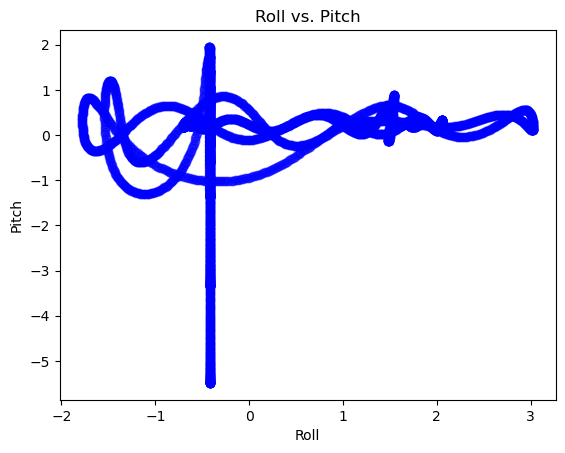

In [79]:
import matplotlib.pyplot as plt

# Example: Plot roll vs. pitch
plt.scatter(df['roll'], df['pitch'], c='blue', alpha=0.5)
plt.xlabel('Roll')
plt.ylabel('Pitch')
plt.title('Roll vs. Pitch')
plt.show()


In [81]:
df['delta_roll'] = df['roll'].diff()
df['delta_pitch'] = df['pitch'].diff()
df['delta_yaw'] = df['yaw'].diff()


In [83]:
df['imu_ang_magnitude'] = (df['imu_ang_x']**2 + df['imu_ang_y']**2 + df['imu_ang_z']**2) ** 0.5
df['imu_accel_magnitude'] = (df['imu_accel_x']**2 + df['imu_accel_y']**2 + df['imu_accel_z']**2) ** 0.5


In [85]:
df['roll_mean'] = df['roll'].rolling(window=10).mean()
df['roll_std'] = df['roll'].rolling(window=10).std()
df['pitch_mean'] = df['pitch'].rolling(window=10).mean()
df['pitch_std'] = df['pitch'].rolling(window=10).std()


In [87]:
from sklearn.preprocessing import StandardScaler

features = ['roll', 'pitch', 'yaw', 'delta_roll', 'delta_pitch', 'imu_ang_magnitude', 'imu_accel_magnitude']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


In [91]:
# Check for NaN values in the selected features
nan_counts = df[features].isnull().sum()
print("NaN counts per feature:")
print(nan_counts)


NaN counts per feature:
roll                   0
pitch                  0
yaw                    0
delta_roll             1
delta_pitch            1
imu_ang_magnitude      0
imu_accel_magnitude    0
dtype: int64


In [93]:
# Drop rows with NaN in the selected features
df = df.dropna(subset=features)

# Model on normal data
## DBSCAN

In [5]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('processed_imu_data.csv')  # Replace with your file name

# Step 2: Select features for anomaly detection
features = ['roll', 'pitch', 'yaw', 'imu_ang_magnitude', 'imu_accel_magnitude', 
            'delta_roll', 'delta_pitch', 'delta_yaw']

# Step 3: Handle missing values (if any)
df[features] = df[features].fillna(df[features].mean())  # Fill NaN with column means

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


In [19]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=2.8, min_samples=5)  # Example adjustment
df['anomaly'] = dbscan.fit_predict(df[features])

# DBSCAN labels: -1 (anomaly), 0, 1, 2, ... (cluster labels)
print(df['anomaly'].value_counts())


anomaly
 0    6228
-1       1
Name: count, dtype: int64


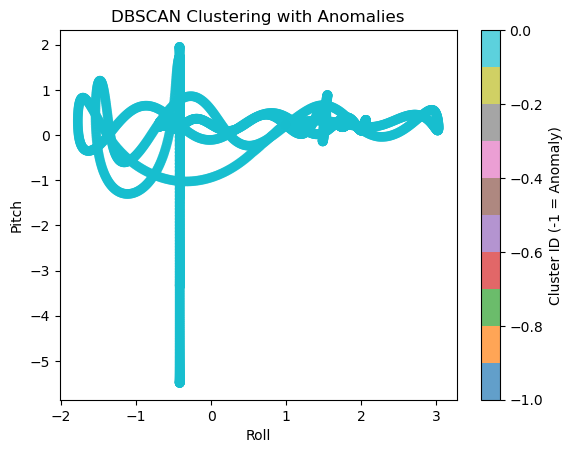

In [21]:
import matplotlib.pyplot as plt

# Scatter plot of Roll vs. Pitch
plt.scatter(df['roll'], df['pitch'], c=df['anomaly'], cmap='tab10', alpha=0.7)
plt.xlabel('Roll')
plt.ylabel('Pitch')
plt.title('DBSCAN Clustering with Anomalies')
plt.colorbar(label='Cluster ID (-1 = Anomaly)')
plt.show()


In [23]:
anomalous_points = df[df['anomaly'] == -1]
print(anomalous_points)


      cmd_vel_x  cmd_vel_y  cmd_vel_z  cmd_ang_x  cmd_ang_y  cmd_ang_z  \
3123        0.1          0          0          0          0        0.3   

      orient_x  orient_y  orient_z  orient_w  ...  quaternion_norm      roll  \
3123  0.000874  0.002821 -0.049445  0.998772  ...                1  0.987072   

         pitch      yaw  imu_ang_magnitude  imu_accel_magnitude  delta_roll  \
3123  0.229293 -1.14995            2.11158             5.284273   -2.414564   

      delta_pitch  delta_yaw  anomaly  
3123    -0.493318  -2.583618       -1  

[1 rows x 26 columns]


In [17]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# Define a range of values for eps and min_samples
eps_values = np.linspace(0.1, 3.0, 30)  # Range for eps
min_samples_values = [5, 10, 15, 20]   # Possible min_samples values

best_params = None
best_anomaly_count = None
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        # Fit DBSCAN model with current eps and min_samples
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['anomaly'] = dbscan.fit_predict(df[features])

        # Count the number of anomalies (-1 values)
        anomaly_count = (df['anomaly'] == -1).sum()

        # Track the best parameter combination based on anomaly count
        if best_anomaly_count is None or anomaly_count < best_anomaly_count:
            best_anomaly_count = anomaly_count
            best_eps = eps
            best_min_samples = min_samples

print(f"Best parameters: eps={best_eps}, min_samples={best_min_samples}")


Best parameters: eps=2.8, min_samples=5


## Isolation Forest

Anomaly counts:
anomaly
 1    6166
-1      63
Name: count, dtype: int64
Anomalies detected:
      cmd_vel_x  cmd_vel_y  cmd_vel_z  cmd_ang_x  cmd_ang_y  cmd_ang_z  \
2373        0.0        0.0        0.0        0.0        0.0        0.5   
2376        0.0        0.0        0.0        0.0        0.0        0.5   
2377        0.0        0.0        0.0        0.0        0.0        0.5   
2379        0.0        0.0        0.0        0.0        0.0        0.5   
2380        0.0        0.0        0.0        0.0        0.0        0.5   
...         ...        ...        ...        ...        ...        ...   
3128        0.1        0.0        0.0        0.0        0.0        0.3   
3129        0.1        0.0        0.0        0.0        0.0        0.3   
3130        0.1        0.0        0.0        0.0        0.0        0.3   
3131        0.1        0.0        0.0        0.0        0.0        0.3   
3137        0.1        0.0        0.0        0.0        0.0        0.3   

      orient_x  ori

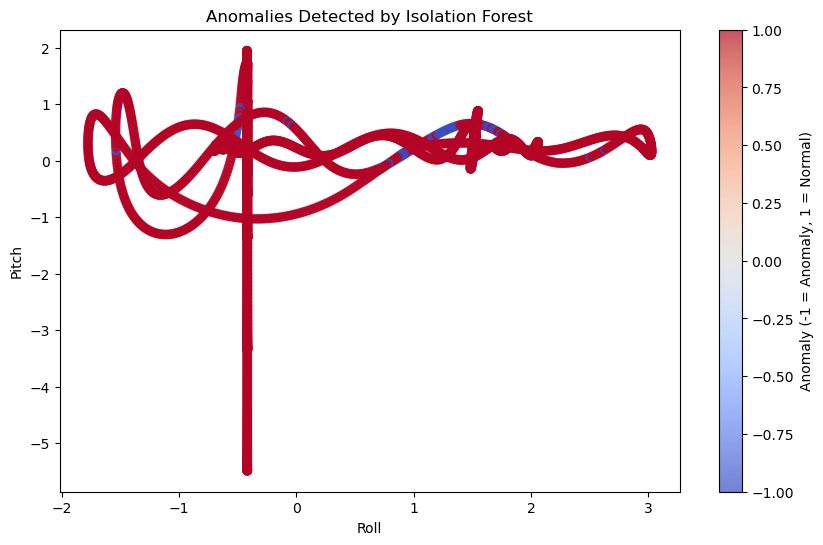

In [121]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('processed_imu_data.csv')  # Replace with your file name

# Step 2: Select features for anomaly detection
features = ['roll', 'pitch', 'yaw', 'imu_ang_magnitude', 'imu_accel_magnitude', 
            'delta_roll', 'delta_pitch', 'delta_yaw']

# Step 3: Handle missing values (if any)
df[features] = df[features].fillna(df[features].mean())  # Fill NaN with column means

# Step 4: Normalize the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Step 5: Train the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # 1% expected anomalies
df['anomaly'] = iso_forest.fit_predict(df[features])  # -1 = anomaly, 1 = normal

# Step 6: Count anomalies
print("Anomaly counts:")
print(df['anomaly'].value_counts())  # -1 = anomalies, 1 = normal

# Step 7: Filter and inspect anomalies
anomalies = df[df['anomaly'] == -1]
print("Anomalies detected:")
print(anomalies)

# Step 8: Visualize anomalies in Roll vs. Pitch
plt.figure(figsize=(10, 6))
plt.scatter(df['roll'], df['pitch'], c=df['anomaly'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Roll')
plt.ylabel('Pitch')
plt.title('Anomalies Detected by Isolation Forest')
plt.colorbar(label='Anomaly (-1 = Anomaly, 1 = Normal)')
plt.show()

# Step 9: Save the results
#df.to_csv('anomaly_detection_results.csv', index=False)
#print("Anomaly detection results saved to 'anomaly_detection_results.csv'")


## One class SVM

Anomaly counts:
anomaly
 1    6165
-1      64
Name: count, dtype: int64


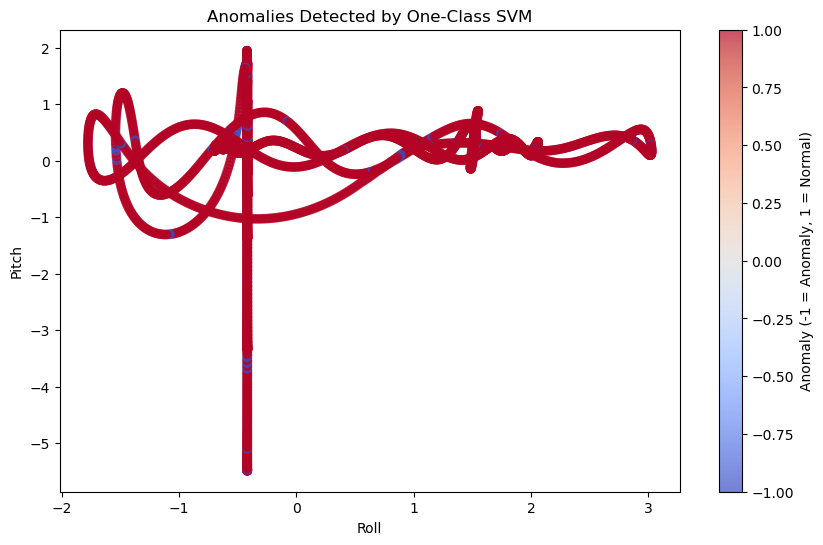

Anomalies detected:
      cmd_vel_x  cmd_vel_y  cmd_vel_z  cmd_ang_x  cmd_ang_y  cmd_ang_z  \
1294        0.3          0          0          0          0        0.0   
1335        0.3          0          0          0          0        0.0   
1342        0.3          0          0          0          0        0.0   
1343        0.3          0          0          0          0        0.0   
1347        0.3          0          0          0          0        0.0   
...         ...        ...        ...        ...        ...        ...   
3787        0.1          0          0          0          0        0.3   
4143        0.0          0          0          0          0        0.0   
4150        0.0          0          0          0          0        0.0   
4204        0.0          0          0          0          0        0.0   
4438        0.0          0          0          0          0        0.0   

      orient_x  orient_y      orient_z  orient_w  ...  quaternion_norm  \
1294  0.000049  0

In [36]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('processed_imu_data.csv')  # Replace with your file name

# Step 3: Handle missing values (if any)
df[features] = df[features].fillna(df[features].mean())  # Fill NaN with column means

# Step 2: Select features for anomaly detection
features = ['roll', 'pitch', 'yaw', 'imu_ang_magnitude', 'imu_accel_magnitude', 
            'delta_roll', 'delta_pitch', 'delta_yaw']

# Step 3: Normalize the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Step 4: Train the One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', nu=0.01, gamma='scale')  # nu controls the proportion of anomalies
df['anomaly'] = oc_svm.fit_predict(df[features])  # -1 = anomaly, 1 = normal

# Step 5: Count anomalies
print("Anomaly counts:")
print(df['anomaly'].value_counts())  # -1 = anomalies, 1 = normal

# Step 6: Visualize anomalies in Roll vs. Pitch
plt.figure(figsize=(10, 6))
plt.scatter(df['roll'], df['pitch'], c=df['anomaly'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Roll')
plt.ylabel('Pitch')
plt.title('Anomalies Detected by One-Class SVM')
plt.colorbar(label='Anomaly (-1 = Anomaly, 1 = Normal)')
plt.show()

# Step 7: Filter and inspect anomalies
anomalies = df[df['anomaly'] == -1]
print("Anomalies detected:")
print(anomalies)

# Optional: Save the dataset with anomaly labels
#df.to_csv('svm_anomaly_detection_results.csv', index=False)
#print("Anomaly detection results saved to 'svm_anomaly_detection_results.csv'")


In [38]:
from sklearn.svm import OneClassSVM

nu_values = [0.01, 0.05, 0.1, 0.2]
best_nu = None
best_anomaly_count = None

for nu in nu_values:
    oc_svm = OneClassSVM(kernel='rbf', nu=nu, gamma='scale')
    df['anomaly'] = oc_svm.fit_predict(df[features])
    anomaly_count = (df['anomaly'] == -1).sum()

    if best_anomaly_count is None or anomaly_count < best_anomaly_count:
        best_anomaly_count = anomaly_count
        best_nu = nu

print(f"Best nu value: {best_nu}, Anomaly count: {best_anomaly_count}")


Best nu value: 0.01, Anomaly count: 64


In [40]:
gamma_values = ['scale', 'auto', 0.1, 0.5, 1.0]
best_gamma = None
best_anomaly_count = None

for gamma in gamma_values:
    oc_svm = OneClassSVM(kernel='rbf', nu=0.05, gamma=gamma)
    df['anomaly'] = oc_svm.fit_predict(df[features])
    anomaly_count = (df['anomaly'] == -1).sum()

    if best_anomaly_count is None or anomaly_count < best_anomaly_count:
        best_anomaly_count = anomaly_count
        best_gamma = gamma

print(f"Best gamma value: {best_gamma}, Anomaly count: {best_anomaly_count}")


Best gamma value: scale, Anomaly count: 312


In [119]:
print(df.columns)


Index(['cmd_vel_x', 'cmd_vel_y', 'cmd_vel_z', 'cmd_ang_x', 'cmd_ang_y',
       'cmd_ang_z', 'orient_x', 'orient_y', 'orient_z', 'orient_w',
       'imu_ang_x', 'imu_ang_y', 'imu_ang_z', 'imu_accel_x', 'imu_accel_y',
       'imu_accel_z', 'quaternion_norm', 'roll', 'pitch', 'yaw',
       'imu_ang_magnitude', 'imu_accel_magnitude', 'delta_roll', 'delta_pitch',
       'delta_yaw'],
      dtype='object')


## Autoencoder

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_csv('processed_imu_data.csv')  # Replace with your file name

# Step 3: Handle missing values (if any)
df[features] = df[features].fillna(df[features].mean())  # Fill NaN with column means
# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Define the autoencoder model
input_dim = scaled_features.shape[1]
autoencoder = Sequential([
    Dense(16, activation='relu', input_dim=input_dim),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(input_dim, activation='linear')  # Reconstruction layer
])
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
autoencoder.fit(scaled_features, scaled_features, epochs=50, batch_size=32, shuffle=True, verbose=0)

# Reconstruction errors
reconstructions = autoencoder.predict(scaled_features)
mse = np.mean(np.power(scaled_features - reconstructions, 2), axis=1)
df['anomaly'] = mse > np.percentile(mse, 95)  # Top 5% as anomalies

print(df['anomaly'].value_counts())


ModuleNotFoundError: No module named 'tensorflow'

## Model on abnormal data

In [130]:
import pandas as pd

# Manually created anomalous data
anomalous_data = pd.DataFrame({
    'cmd_vel_x': [0.0, 0.3, 10.0, 0.0, 0.0],  # Entry 3 has extremely high linear velocity
    'cmd_vel_y': [0.0, 0.0, 0.0, 0.0, 0.0],
    'cmd_vel_z': [0.0, 0.0, 0.0, 0.0, 0.0],
    'cmd_ang_x': [0.0, 0.0, 0.0, 0.0, 10.0],  # Entry 5 has extreme angular velocity
    'cmd_ang_y': [0.0, 0.0, 0.0, 0.0, 0.0],
    'cmd_ang_z': [0.5, 0.5, 0.5, -10.0, 0.5],  # Entry 4 has extreme angular rotation
    'orient_x': [0.0, 0.1, -0.1, 1.0, 0.0],  # Entry 4 has an unusual quaternion
    'orient_y': [0.0, 0.1, -0.1, 1.0, 0.0],
    'orient_z': [0.0, 0.1, -0.1, 1.0, 0.0],
    'orient_w': [1.0, 0.9, 0.9, 0.0, 1.0],  # Entry 4 has a quaternion norm drift
    'imu_ang_x': [0.1, 0.2, 0.3, 0.1, 20.0],  # Entry 5 has an unusual angular velocity
    'imu_ang_y': [0.1, 0.2, 0.3, 0.1, 20.0],
    'imu_ang_z': [0.1, 0.2, 0.3, 0.1, 20.0],
    'imu_accel_x': [0.1, 0.2, 50.0, 0.1, 0.1],  # Entry 3 has a spike in acceleration
    'imu_accel_y': [0.1, 0.2, -50.0, 0.1, 0.1],  # Entry 3 has another spike in acceleration
    'imu_accel_z': [9.8, 9.8, 9.8, 50.0, 9.8],  # Entry 4 has an unusually high vertical acceleration
    'quaternion_norm': [1.0, 1.0, 1.0, 3.0, 1.0],  # Entry 4 has drift in quaternion norm
    'roll': [0.0, 0.1, 0.2, 10.0, -10.0],  # Entry 4 and 5 have extreme roll values
    'pitch': [0.0, 0.1, 0.2, 10.0, -10.0],  # Entry 4 and 5 have extreme pitch values
    'yaw': [0.0, 0.1, 0.2, 10.0, -10.0],  # Entry 4 and 5 have extreme yaw values
    'imu_ang_magnitude': [0.2, 0.5, 1.0, 2.0, 50.0],  # Entry 5 has unusually high angular magnitude
    'imu_accel_magnitude': [9.8, 9.8, 70.0, 50.0, 9.8],  # Entry 3 and 4 have spikes in acceleration magnitude
    'delta_roll': [0.01, 0.02, 0.03, 5.0, -5.0],  # Entry 4 and 5 have sharp changes in roll
    'delta_pitch': [0.01, 0.02, 0.03, 5.0, -5.0],  # Entry 4 and 5 have sharp changes in pitch
    'delta_yaw': [0.01, 0.02, 0.03, 5.0, -5.0]   # Entry 4 and 5 have sharp changes in yaw
})


In [132]:
# Load your existing dataset
df = pd.read_csv('processed_imu_data.csv')

# Append anomalous data to the dataset
df_with_anomalies = pd.concat([df, anomalous_data], ignore_index=True)

# Save the updated dataset
df_with_anomalies.to_csv('processed_imu_data_with_manual_anomalies.csv', index=False)
print("Manually created anomalies added and saved to 'processed_imu_data_with_manual_anomalies.csv'")


Manually created anomalies added and saved to 'processed_imu_data_with_manual_anomalies.csv'


Anomaly counts:
anomaly
 1    6168
-1      66
Name: count, dtype: int64


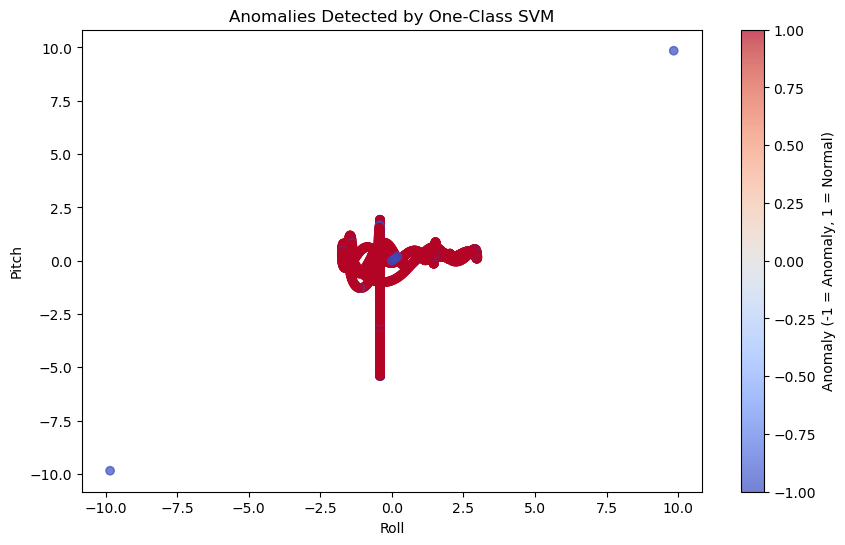

Anomalies detected:
      cmd_vel_x  cmd_vel_y  cmd_vel_z  cmd_ang_x  cmd_ang_y  cmd_ang_z  \
624         0.0        0.0        0.0        0.0        0.0        0.0   
1294        0.3        0.0        0.0        0.0        0.0        0.0   
1328        0.3        0.0        0.0        0.0        0.0        0.0   
1335        0.3        0.0        0.0        0.0        0.0        0.0   
1342        0.3        0.0        0.0        0.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
6229        0.0        0.0        0.0        0.0        0.0        0.5   
6230        0.3        0.0        0.0        0.0        0.0        0.5   
6231       10.0        0.0        0.0        0.0        0.0        0.5   
6232        0.0        0.0        0.0        0.0        0.0      -10.0   
6233        0.0        0.0        0.0       10.0        0.0        0.5   

      orient_x  orient_y      orient_z  orient_w  ...  quaternion_norm  \
624   0.000049  0

In [138]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('processed_imu_data_with_manual_anomalies.csv')  # Replace with your file name

# Step 3: Handle missing values (if any)
df[features] = df[features].fillna(df[features].mean())  # Fill NaN with column means

# Step 2: Select features for anomaly detection
features = ['roll', 'pitch', 'yaw', 'imu_ang_magnitude', 'imu_accel_magnitude', 
            'delta_roll', 'delta_pitch', 'delta_yaw']

# Step 3: Normalize the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Step 4: Train the One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', nu=0.01, gamma='scale')  # nu controls the proportion of anomalies
df['anomaly'] = oc_svm.fit_predict(df[features])  # -1 = anomaly, 1 = normal

# Step 5: Count anomalies
print("Anomaly counts:")
print(df['anomaly'].value_counts())  # -1 = anomalies, 1 = normal

# Step 6: Visualize anomalies in Roll vs. Pitch
plt.figure(figsize=(10, 6))
plt.scatter(df['roll'], df['pitch'], c=df['anomaly'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Roll')
plt.ylabel('Pitch')
plt.title('Anomalies Detected by One-Class SVM')
plt.colorbar(label='Anomaly (-1 = Anomaly, 1 = Normal)')
plt.show()

# Step 7: Filter and inspect anomalies
anomalies = df[df['anomaly'] == -1]
print("Anomalies detected:")
print(anomalies)

# Optional: Save the dataset with anomaly labels
#df.to_csv('svm_anomaly_detection_results.csv', index=False)
#print("Anomaly detection results saved to 'svm_anomaly_detection_results.csv'")

In [31]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('processed_imu_data_with_manual_anomalies.csv')  # Replace with your file name

# Step 2: Select features for anomaly detection
features = ['roll', 'pitch', 'yaw', 'imu_ang_magnitude', 'imu_accel_magnitude', 
            'delta_roll', 'delta_pitch', 'delta_yaw']

# Step 3: Handle missing values (if any)
df[features] = df[features].fillna(df[features].mean())  # Fill NaN with column means

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.8, min_samples=5)  # Example adjustment
df['anomaly'] = dbscan.fit_predict(df[features])

# DBSCAN labels: -1 (anomaly), 0, 1, 2, ... (cluster labels)
print(df['anomaly'].value_counts())

anomaly
 0    6229
-1       5
Name: count, dtype: int64


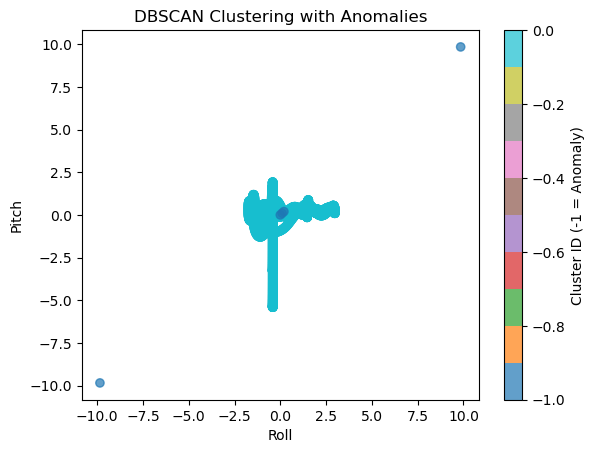

In [33]:
import matplotlib.pyplot as plt

# Scatter plot of Roll vs. Pitch
plt.scatter(df['roll'], df['pitch'], c=df['anomaly'], cmap='tab10', alpha=0.7)
plt.xlabel('Roll')
plt.ylabel('Pitch')
plt.title('DBSCAN Clustering with Anomalies')
plt.colorbar(label='Cluster ID (-1 = Anomaly)')
plt.show()